<a href="https://colab.research.google.com/github/svhenrique/ufal/blob/main/PAA/TreeSortAnalise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sobre o Algoritmo Tree Sort

**Sobre o algoritmo**

O algoritmo de ordenação Tree Sort é baseado na estrutura de dados Árvore de Busca Binária e retorna o input de elementos ordenados em valor crescente.

Consiste, o algoritmo, em criar uma arvore de busca binária dos elementos que serão ordenados, 
então os elementos são coletados do primeiro nó a esquerda até o ultimo nó a direita, 
quando houverem dois nós, um a esquerda e outro a direita, é coletado o da esquerda primeiro.



**Inventado em 1960**

**Complexidade:**

* Caso Médio: O(n log n) - Desordenado.
* Pior Caso: O(n²) - Ordenado crescentemente ou decresentemente

**Estabilidade**:
  * Como Tree Sort é baseado na Árvore de Busca Binária, ele é um algoritmo estável. 

**Interna ou Externa**:
  
O algoritmo funciona tanto para as entradas internas e externas, mas sua característica principal de árvore é ser usado para ordenação externa.

**Algoritmo Tree Sort**


1.   Reeceba os elementos de um input em um array.
2.   Criar uma árvore de busca binária inserindo os elementos do array.
3.   Colete do elemento mais a esquerda da arvore até o mais a direita árvore para ordenar o array.



**Fontes:**
* https://www.geeksforgeeks.org/tree-sort/
* https://www.geeksforgeeks.org/self-balancing-binary-search-trees-comparisons/
* https://en.wikipedia.org/wiki/Self-balancing_binary_search_tree
* https://www.geeksforgeeks.org/how-to-handle-duplicates-in-binary-search-tree/
* https://www.geeksforgeeks.org/inorder-tree-traversal-without-recursion/


## Codificando

### Algoritmo com recursão

In [ ]:
class No: 
  
    def __init__(self, valor): 
        self.valor = valor
        self.quantidade = 1
        self.esquerda = None
        self.direita = None

class TreeSortRecursion:
  """
    comparacoes representa o numero de comparacoes feitas na ordenacao
    operacoes representa o numero de Nos criados e vinculados a arvora
  """
  comparacoes = 0
  operacoes = 0 
  
  def _insert(self, no, valor):
      
      self.comparacoes += 1

      if no == None:
          self.operacoes += 1
          return No(valor)

      if valor == no.valor:
          (no.quantidade) += 1
          self.operacoes += 1
          return no
    
      if valor < no.valor: 
          no.esquerda = self._insert(no.esquerda, valor) 
      else:
          no.direita = self._insert(no.direita, valor)
    
      return no

  def _inorder(self, root):
    if root != None:
        self._inorder(root.esquerda)
        print('{}'.format(f' {root.valor}'*root.quantidade), 
                                 end = "") 
        self._inorder(root.direita)
  
  def insert_vector(self, valores):
    root = self._insert(None, valores[0])
    for valor in range(1, len(valores)):
      root = self._insert(root, valores[valor])
    #self._inorder(root)


### Algoritmo sem recursão

In [1]:
class No: 
  
    def __init__(self, valor): 
        self.valor = valor
        self.quantidade = 1
        self.esquerda = None
        self.direita = None
  

class TreeSortIterative:
  """
    comparacoes representa o numero de comparacoes feitas na ordenacao
    operacoes representa o numero de Nos criados e vinculados a arvora
  """

  comparacoes = 0

  def __init__(self, raiz):
    self.raiz = No(raiz)
    self.operacoes = 1

  def _insert(self, valor):

      no = self.raiz

      while True:
        
        self.comparacoes += 1

        if valor == no.valor:
          no.quantidade += 1
          self.operacoes += 1
          return no

        elif valor < no.valor:

          if no.esquerda is None:
            no.esquerda = No(valor)
            self.operacoes += 1
            return no

          no = no.esquerda

        else:

          if no.direita is None:
            no.direita = No(valor)
            self.operacoes += 1
            return no

          no = no.direita
        
  def _inorder(self):

    no = self.raiz
    pilha = []

    while True:
      
      if no is not None:
        pilha.append(no)
        no = no.esquerda

      elif no is None and len(pilha) > 0:
        no_removido = pilha.pop()
        print('{}'.format( (str(no_removido.valor)+' ') * no_removido.quantidade), end='')
        no = no_removido.direita
     
      else:
        break

  def insert_vector(self, valores):
    for valor in range(1, len(valores)):
      root = self._insert(valores[valor])
    self._inorder()

### Abstração para rodar os algoritmos

In [ ]:
# funcao para ordenar usando algoritmo com recursao
import time # biblioteca para medir tempo
def ordenar_com_recursao(valores):
  inicio = time.time()
  
  tree = TreeSortRecursion()
  tree.insert_vector(valores)
  
  fim = time.time()

  print()

  
  # tempo de execucao
  tempo = fim - inicio
  
  comparacoes = tree.comparacoes
  operacoes = tree.operacoes

  return {
      'tempo em segundos':tempo, 
      'comparacoes': comparacoes,
      'operacoes':operacoes
  }

In [2]:
# funcao para ordenar usando algoritmo sem recursao (iterativo)

import time # biblioteca para medir tempo
def ordenar_sem_recursao(valores):

  inicio = time.time()
  raiz = valores[0]
  tree = TreeSortIterative(raiz)
  tree.insert_vector(valores)
  fim = time.time()
  print()

  
  # tempo de execucao
  tempo = fim - inicio
  
  comparacoes = tree.comparacoes
  operacoes = tree.operacoes

  return {
      'tempo em segundos':tempo, 
      'comparacoes': comparacoes,
      'operacoes': operacoes
  }

## Testando

In [ ]:
import random
from matplotlib import pyplot as plt

### 10000 elementos

In [ ]:
pior_caso = list(range(10000, 0, -1))
melhor_caso = list(range(1, 10001))
medio_caso = random.sample(range(1, 1000000001), 10000) # aumentando range para coletar numeros aleatorios

#### Testando para melhor caso

In [ ]:
ordenar_com_recursao(melhor_caso)

RecursionError: ignored

Como a função com recursão não aceita inputs com mais de 10000, não será mais usada.
Continuaremos usando a função iterativa por esse motivo.

In [ ]:
melhor = ordenar_sem_recursao(melhor_caso)
melhor

{'comparacoes': 49995000,
 'operacoes': 10000,
 'tempo em segundos': 18.495849132537842}

#### Testando para o pior caso

In [ ]:
pior = ordenar_sem_recursao(pior_caso)
pior

{'comparacoes': 49995000,
 'operacoes': 10000,
 'tempo em segundos': 18.645413398742676}

#### Testando para o caso médio

In [ ]:
medio = ordenar_sem_recursao(medio_caso)
medio

{'comparacoes': 161359,
 'operacoes': 10000,
 'tempo em segundos': 0.10057640075683594}

#### Comparando

Comparando os resultados dos parâmetros retornados pela função de ordenação nos 3 casos, melhor, medio e pior.

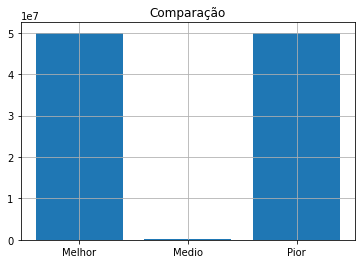

In [ ]:
# comparacoes
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['comparacoes'], medio['comparacoes'], pior['comparacoes']])
plt.title('Comparação')
plt.grid(True)
plt.show()

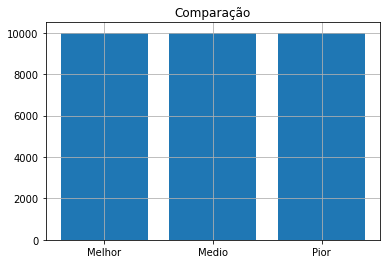

In [ ]:
# operacoes
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['operacoes'], medio['operacoes'], pior['operacoes']])
plt.title('Comparação')
plt.grid(True)
plt.show()

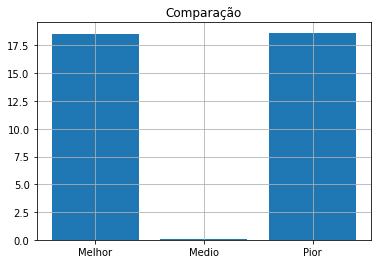

In [ ]:
# tempo
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['tempo em segundos'], medio['tempo em segundos'], pior['tempo em segundos']])
plt.title('Comparação')
plt.grid(True)
plt.show()

### 100000 elementos

In [ ]:
pior_caso = list(range(100000, 0, -1))
melhor_caso = list(range(1, 100001))
medio_caso = random.sample(range(1, 1000000001), 100000)

#### Testando para melhor caso

In [ ]:
melhor = ordenar_sem_recursao(melhor_caso)
melhor

{'comparacoes': 4999950000,
 'operacoes': 100000,
 'tempo em segundos': 1941.6711933612823}

#### Testando para o pior caso

In [ ]:
pior = ordenar_sem_recursao(pior_caso)
pior

{'comparacoes': 4999950000,
 'operacoes': 100000,
 'tempo em segundos': 1971.238587141037}

#### Testando para o caso médio

In [ ]:
medio = ordenar_sem_recursao(medio_caso)
medio

{'comparacoes': 2034879,
 'operacoes': 100000,
 'tempo em segundos': 1.537031888961792}

#### Comparando

Comparando os resultados dos parâmetros retornados pela função de ordenação nos 3 casos, melhor, medio e pior.

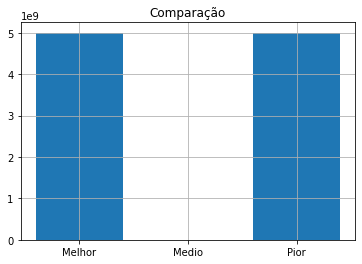

In [ ]:
# comparacoes
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['comparacoes'], medio['comparacoes'], pior['comparacoes']])
plt.title('Comparação')
plt.grid(True)
plt.show()

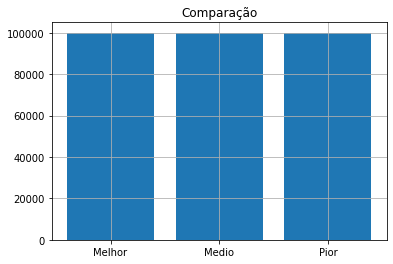

In [ ]:
# operacoes
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['operacoes'], medio['operacoes'], pior['operacoes']])
plt.title('Comparação')
plt.grid(True)
plt.show()

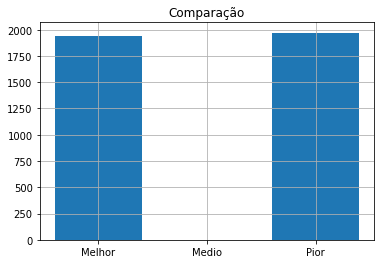

In [ ]:
# tempo
plt.bar(['Melhor', 'Medio', 'Pior'], [melhor['tempo em segundos'], medio['tempo em segundos'], pior['tempo em segundos']])
plt.title('Comparação')
plt.grid(True)
plt.show()

### Analisando testes aprofundadamente

In [ ]:
piores_casos, melhores_casos, medios_casos = [], [], []

ordenar = ordenar_sem_recursao
for c in range(50):
  
  numeros = random.sample(range(1, 1000000001), 10000)

  medios_casos.append(ordenar(numeros))
  numeros.sort()
  melhores_casos.append(ordenar(numeros))
  numeros.reverse()
  piores_casos.append(ordenar(numeros))


Comparando os parâmetros individualmente.

#### Melhores casos

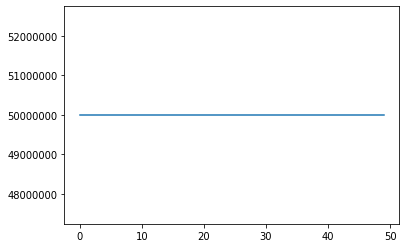

In [ ]:
# comparacoes
plt.plot([analise['comparacoes'] for analise in melhores_casos])
plt.ticklabel_format(style = 'plain')
plt.show()

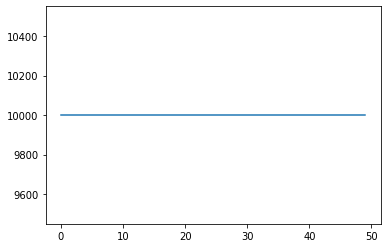

In [ ]:
# operacoes
plt.plot([analise['operacoes'] for analise in melhores_casos])
plt.show()

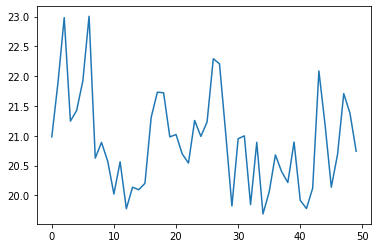

In [ ]:
# tempo 
plt.plot([analise['tempo em segundos'] for analise in melhores_casos])
plt.show()

#### Medios casos

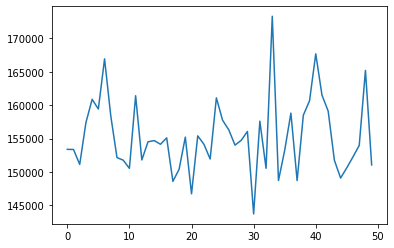

In [ ]:
# comparacoes
plt.plot([analise['comparacoes'] for analise in medios_casos])
plt.show()

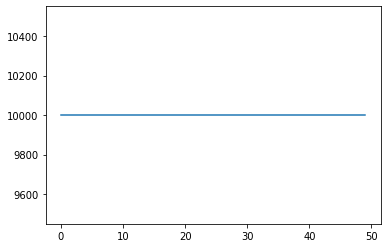

In [ ]:
# operacoes
plt.plot([analise['operacoes'] for analise in medios_casos])
plt.show()

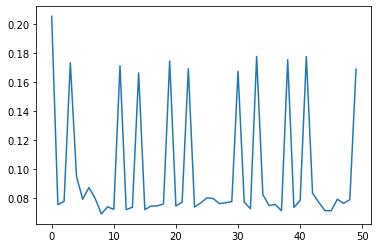

In [ ]:
# tempo
plt.plot([analise['tempo em segundos'] for analise in medios_casos])
plt.show()

#### Piores casos

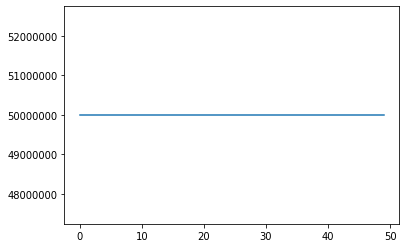

In [ ]:
# comparacoes
plt.plot([analise['comparacoes'] for analise in piores_casos])
plt.ticklabel_format(style = 'plain')
plt.show()

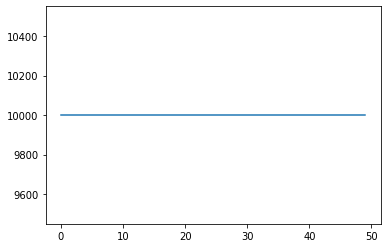

In [ ]:
# operacoes
plt.plot([analise['operacoes'] for analise in piores_casos])
plt.show()

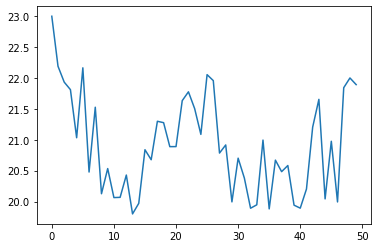

In [ ]:
# tempo
plt.plot([analise['tempo em segundos'] for analise in piores_casos])
plt.show()

#### Comparando resultados

Comparando os os parâmetros entre os 3 casos.

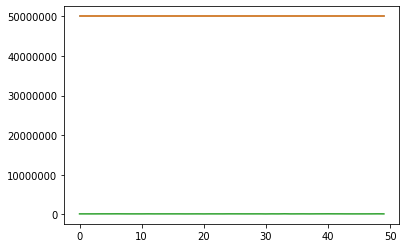

In [ ]:
# comparacao 
plt.plot([analise['comparacoes'] for analise in piores_casos])
plt.plot([analise['comparacoes'] for analise in melhores_casos])
plt.plot([analise['comparacoes'] for analise in medios_casos])
plt.ticklabel_format(style = 'plain')
plt.show()

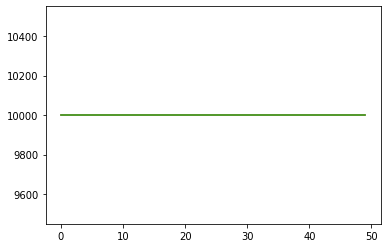

In [ ]:
# operacoes 
plt.plot([analise['operacoes'] for analise in piores_casos])
plt.plot([analise['operacoes'] for analise in melhores_casos])
plt.plot([analise['operacoes'] for analise in medios_casos])
plt.show()

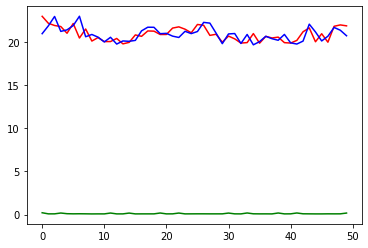

In [ ]:
# tempo em segundos 
plt.plot([analise['tempo em segundos'] for analise in piores_casos], color='red')
plt.plot([analise['tempo em segundos'] for analise in melhores_casos], color='blue')
plt.plot([analise['tempo em segundos'] for analise in medios_casos], color='green')
plt.show()

## Considerações

Como o algoritmo é O(n²) para o pior caso, não foi possível calcular as listas com 1 milhão e 10 milhões de elementos por conta do tempo que tinhamos para a entrega desse trabalho. Um único teste de 1 milhão passou 3 dias para ser completado e os de 10 milhões ficou 4 dias em estágio de processamento, até seu cancelamento.

## Conclusões sobre as análises

*   O número de operações sempre vai ser o mesmo do número de elementos a serem ordenados.
*   Em um input ordenado,  de forma crescente ou decrescente, o algoritmo fará mais comparações que em um desordenado.
*   Em um input ordenado,  de forma crescente ou decrescente, o algoritmo demorará mais para terminar a árvore que em um desordenado.
*   Curiosamente, se o algoritmo for utilizado talvez seja mais proveitoso desordenar a entrada antes da criação da árvore, garantindo a desordenação e acelerando o projeto para O(nlogn).


 

## Comparando com outros algoritmos

In [3]:
# variaveis GLOBAIS para facilitar analise de algoritmo 
lista_comparacoes = [0, 0, 0]

In [4]:
# bibliotecas que serao usadas 
import random
import time
from matplotlib import pyplot as plt

### Merge Sort

Algoritmo implementado na disciplina de Estrutuda de Dados.

Sobre o algoritmo:

*   https://www.geeksforgeeks.org/merge-sort/




In [5]:
def merge_sort(lista):
	return divisao(lista)

def divisao(lista):
	#dividir a lista

  lista_comparacoes[0] += 1  # variavel de analise

  lista1 = lista2 = [] 

  if len(lista)>1: 
    meio = len(lista)//2
    lista1 = divisao(lista[0:meio])
    lista2 = divisao(lista[meio:])
    return combinacao(lista1,lista2)
  else:
    return lista

def combinacao(lista1,lista2):
  i = j = 0
  lista = []
  for c in range(len(lista1)+len(lista2)):
    
    lista_comparacoes[0] += 1 # variavel de analise

    if i == len(lista1):
      lista.append(lista2[j])
      j+=1

    elif j == len(lista2):
      lista.append(lista1[i])
      i+=1

    elif lista1[i]<lista2[j]:
      lista.append(lista1[i])
      i+=1
    else:
      lista.append(lista2[j])
      j+=1
  return lista

### Quick Sort 

Algoritmo implementado na disciplina de Estrutuda de Dados.

Sobre o algoritmo:

*   https://www.geeksforgeeks.org/quick-sort/



In [6]:
def quick_sort(lista,p,r):

  lista_comparacoes[1] += 1 # variavel de analise

  if p<r:
    q = particao(lista,p,r)
    lista = quick_sort(lista,p,q)
    lista = quick_sort(lista,q+1,r)
  return lista

def particao(lista,p,r):
  pivo = lista[(p+r)//2]
  i = p-1
  j = r+1

  lista_comparacoes[1] += 1 # variavel de analise

  while i < j:
    j-=1

    while lista[j]>pivo:
      lista_comparacoes[1] += 1 # variavel de analise
      j-=1

    i +=1
    while lista[i]<pivo:
      lista_comparacoes[1] += 1 # variavel de analise
      i+=1
    
    lista_comparacoes[1] += 1 # variavel de analise
    if i<j:
      lista[i],lista[j] = lista[j],lista[i]

    lista_comparacoes[1] += 1 # variavel de analise

  return j


### Heap Sort

Implementação do algoritmo foi obtido no site geeksforgeeks


Sobre o algoritmo:

*   https://www.geeksforgeeks.org/heap-sort/

In [7]:
def heapify(arr, n, i):
    largest = i  # Initialize largest as root
    l = 2 * i + 1     # left = 2*i + 1
    r = 2 * i + 2     # right = 2*i + 2
 
    lista_comparacoes[2] += 2 # variavel de analise
    # See if left child of root exists and is
    # greater than root
    if l < n and arr[largest] < arr[l]:
        largest = l
 
    lista_comparacoes[2] += 2 # variavel de analise
    # See if right child of root exists and is
    # greater than root
    if r < n and arr[largest] < arr[r]:
        largest = r
 
    lista_comparacoes[2] += 1 # variavel de analise
    # Change root, if needed
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
 
        # Heapify the root.
        heapify(arr, n, largest)
 
# The main function to sort an array of given size
 
 
def heapSort(arr):
    n = len(arr)
 
    # Build a maxheap.
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)
 
    # One by one extract elements
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)
 

### Abstrações para os algoritmos comparados

In [8]:
# funcao para ordenar usando Merge Sort

def merge_sort_analise(valores):

  inicio = time.time()
  merge_sort(valores)
  fim = time.time()
  print()

  
  # tempo de execucao
  tempo = fim - inicio
  
  comparacoes = lista_comparacoes[0]

  return {
      'tempo em segundos':tempo, 
      'comparacoes': comparacoes,
  }

In [9]:
# funcao para ordenar usando Quick Sort

def quick_sort_analise(valores):

  inicio = time.time()
  quick_sort(valores, 0, len(valores)-1)
  fim = time.time()
  print()

  
  # tempo de execucao
  tempo = fim - inicio
  
  comparacoes = lista_comparacoes[1]

  return {
      'tempo em segundos':tempo, 
      'comparacoes': comparacoes,
  }

In [10]:
# funcao para ordenar usando Quick Sort

def heap_sort_analise(valores):

  inicio = time.time()
  heapSort(valores)
  fim = time.time()
  print()

  
  # tempo de execucao
  tempo = fim - inicio
  
  comparacoes = lista_comparacoes[1]

  return {
      'tempo em segundos':tempo, 
      'comparacoes': comparacoes,
  }

### Comparações

Testes feitos com 50 listas de 10000 elementos gerados aleatoriamente.

In [ ]:
merge = {
    'pior': [], 
    'medio': [], 
    'melhor':[]
}

quick = {
    'pior': [], 
    'medio': [], 
    'melhor':[]
}

heap = {
    'pior': [], 
    'medio': [], 
    'melhor':[]
}

tree = {
    'pior': [], 
    'medio': [], 
    'melhor':[]
}

ordenar = ordenar_sem_recursao # para tree sort
for c in range(50):
  
  numeros = random.sample(range(1, 1000000001), 10000)

  # Caso medio
  merge['medio'].append(merge_sort_analise(numeros.copy()))
  quick['medio'].append(quick_sort_analise(numeros.copy()))
  heap['medio'].append(heap_sort_analise(numeros.copy()))
  tree['medio'].append(ordenar(numeros.copy()))


  # Melhor caso
  numeros.sort()
  merge['melhor'].append(merge_sort_analise(numeros.copy()))
  quick['melhor'].append(quick_sort_analise(numeros.copy()))
  heap['melhor'].append(heap_sort_analise(numeros.copy()))
  tree['melhor'].append(ordenar(numeros.copy()))


  # Pior caso
  numeros.reverse()
  merge['pior'].append(merge_sort_analise(numeros.copy()))
  quick['pior'].append(quick_sort_analise(numeros.copy()))
  heap['pior'].append(heap_sort_analise(numeros.copy()))
  tree['pior'].append(ordenar(numeros.copy()))


#### Melhores casos

Media das comparações
merge: 11597932.5
quick: 14356813.32
heap: 14356813.32
tree: 49995000.0


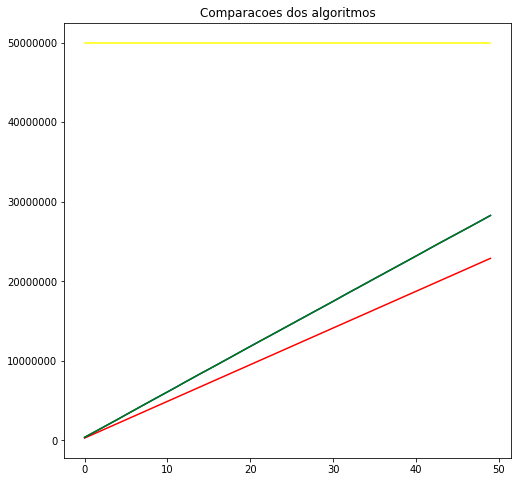

In [12]:
# comparacoes
print('Media das comparações')

algoritmos = ['merge', 'quick', 'heap', 'tree']
c = 0
for algoritmo in [merge, quick, heap, tree]:
  valores = [valor['comparacoes'] for valor in algoritmo['melhor']]
  print('{}: {}'.format(algoritmos[c], sum(valores)/len(valores)))
  c += 1

plt.figure(figsize=(8, 8)) 
plt.plot([analise['comparacoes'] for analise in merge['melhor']], color='red')
plt.plot([analise['comparacoes'] for analise in quick['melhor']], color='blue')
plt.plot([analise['comparacoes'] for analise in heap['melhor']], color='green')
plt.plot([analise['comparacoes'] for analise in tree['melhor']], color='yellow')
plt.ticklabel_format(style = 'plain')
plt.title('Comparacoes dos algoritmos')
plt.show()


Media dos segundos
merge: 0.13447287559509277
quick: 0.07072096824645996
heap: 0.19668238639831542
tree: 18.027826728820802


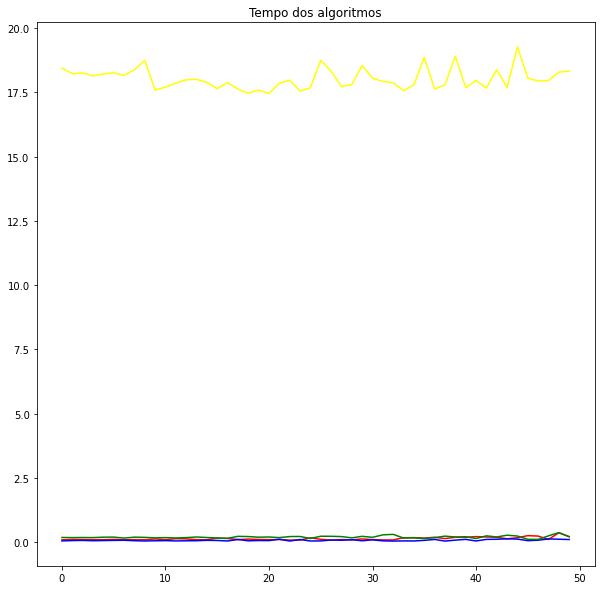

In [13]:
# tempo em segundos 

print('Media dos segundos')

algoritmos = ['merge', 'quick', 'heap', 'tree']
c = 0
for algoritmo in [merge, quick, heap, tree]:
  valores = [valor['tempo em segundos'] for valor in algoritmo['melhor']]
  print('{}: {}'.format(algoritmos[c], sum(valores)/len(valores)))
  c += 1
  
plt.figure(figsize=(10, 10)) 
plt.plot([analise['tempo em segundos'] for analise in merge['melhor']], color='red')
plt.plot([analise['tempo em segundos'] for analise in quick['melhor']], color='blue')
plt.plot([analise['tempo em segundos'] for analise in heap['melhor']], color='green')
plt.plot([analise['tempo em segundos'] for analise in tree['melhor']], color='yellow')
plt.title("Tempo dos algoritmos")
plt.show()

#### Medios casos

Media das comparações
merge: 11444317.5
quick: 14183200.32
heap: 14183200.32
tree: 155754.0


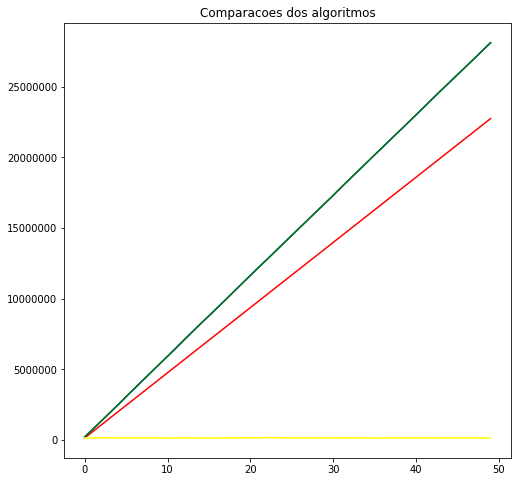

In [14]:
# comparacoes
print('Media das comparações')

algoritmos = ['merge', 'quick', 'heap', 'tree']
c = 0
for algoritmo in [merge, quick, heap, tree]:
  valores = [valor['comparacoes'] for valor in algoritmo['medio']]
  print('{}: {}'.format(algoritmos[c], sum(valores)/len(valores)))
  c += 1

plt.figure(figsize=(8, 8)) 
plt.plot([analise['comparacoes'] for analise in merge['medio']], color='red')
plt.plot([analise['comparacoes'] for analise in quick['medio']], color='blue')
plt.plot([analise['comparacoes'] for analise in heap['medio']], color='green')
plt.plot([analise['comparacoes'] for analise in tree['medio']], color='yellow')
plt.ticklabel_format(style = 'plain')
plt.title('Comparacoes dos algoritmos')
plt.show()

Media dos segundos
merge: 0.13936355113983154
quick: 0.09363266468048095
heap: 0.16749886512756348
tree: 2.0749953508377077


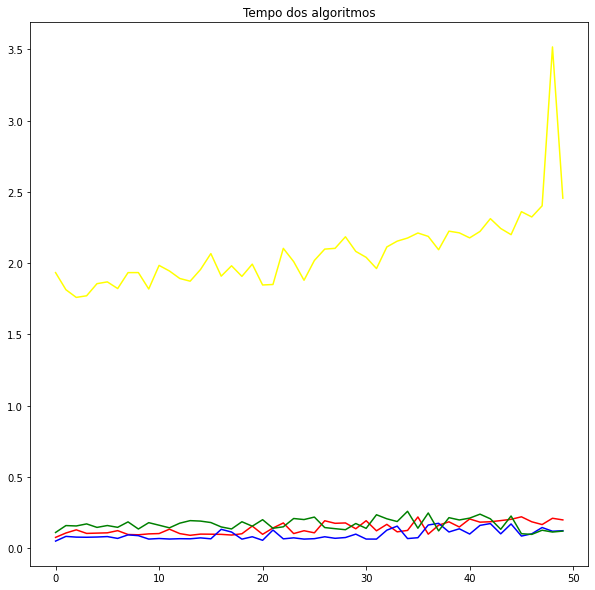

In [15]:
# tempo em segundos 

print('Media dos segundos')

algoritmos = ['merge', 'quick', 'heap', 'tree']
c = 0
for algoritmo in [merge, quick, heap, tree]:
  valores = [valor['tempo em segundos'] for valor in algoritmo['medio']]
  print('{}: {}'.format(algoritmos[c], sum(valores)/len(valores)))
  c += 1
  
plt.figure(figsize=(10, 10)) 
plt.plot([analise['tempo em segundos'] for analise in merge['medio']], color='red')
plt.plot([analise['tempo em segundos'] for analise in quick['medio']], color='blue')
plt.plot([analise['tempo em segundos'] for analise in heap['medio']], color='green')
plt.plot([analise['tempo em segundos'] for analise in tree['medio']], color='yellow')
plt.title("Tempo dos algoritmos")
plt.show()

#### Piores casos

Media das comparações
merge: 11751547.5
quick: 14530427.32
heap: 14530427.32
tree: 49995000.0


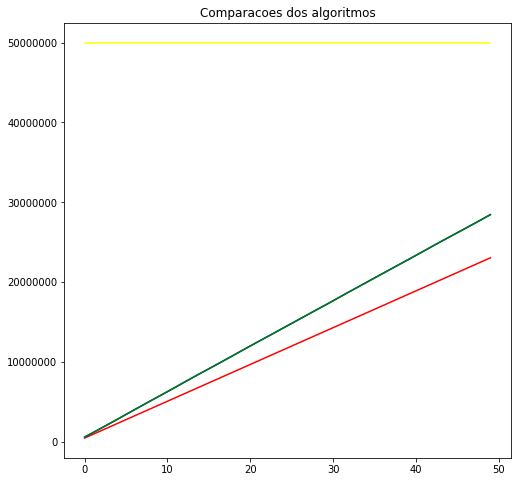

In [16]:
# comparacoes
print('Media das comparações')

algoritmos = ['merge', 'quick', 'heap', 'tree']
c = 0
for algoritmo in [merge, quick, heap, tree]:
  valores = [valor['comparacoes'] for valor in algoritmo['pior']]
  print('{}: {}'.format(algoritmos[c], sum(valores)/len(valores)))
  c += 1

plt.figure(figsize=(8, 8)) 
plt.plot([analise['comparacoes'] for analise in merge['pior']], color='red')
plt.plot([analise['comparacoes'] for analise in quick['pior']], color='blue')
plt.plot([analise['comparacoes'] for analise in heap['pior']], color='green')
plt.plot([analise['comparacoes'] for analise in tree['pior']], color='yellow')
plt.ticklabel_format(style = 'plain')
plt.title('Comparacoes dos algoritmos')
plt.show()

Media dos segundos
merge: 0.1359153413772583
quick: 0.06444832801818848
heap: 0.1711498212814331
tree: 17.686182932853697


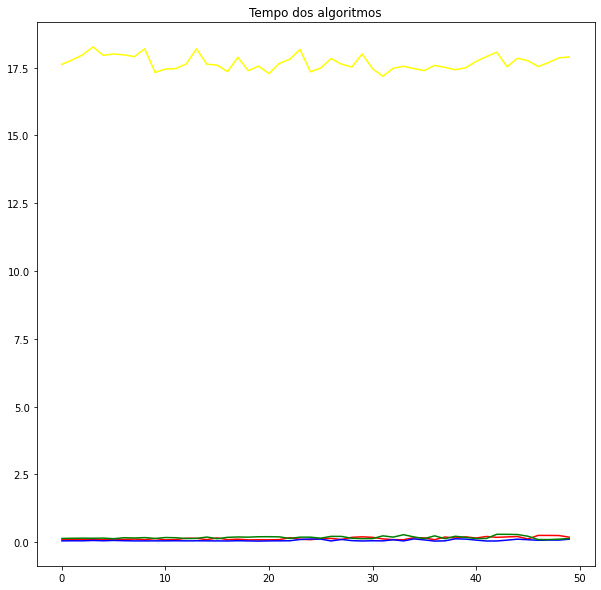

In [17]:
# tempo em segundos 

print('Media dos segundos')

algoritmos = ['merge', 'quick', 'heap', 'tree']
c = 0
for algoritmo in [merge, quick, heap, tree]:
  valores = [valor['tempo em segundos'] for valor in algoritmo['pior']]
  print('{}: {}'.format(algoritmos[c], sum(valores)/len(valores)))
  c += 1
  
plt.figure(figsize=(10, 10)) 
plt.plot([analise['tempo em segundos'] for analise in merge['pior']], color='red')
plt.plot([analise['tempo em segundos'] for analise in quick['pior']], color='blue')
plt.plot([analise['tempo em segundos'] for analise in heap['pior']], color='green')
plt.plot([analise['tempo em segundos'] for analise in tree['pior']], color='yellow')
plt.title("Tempo dos algoritmos")
plt.show()

#### Conclusão das comparações entre algoritmos



*   Os algoritmos Heap Sort e Quick Sort são iguais em números de comparações feitas.
*   O Tree Sort oscila em 20 segundos quando processa uma lista já ordenada, crescentemente ou decrescentemente, enquanto os outros algoritmos (Heap, Merge e Quick) oscilam entre 1 segundo.
*   Mesmo no caso médio, lista não ordenada, o Tree Sort oscila em 2 segundos enquanto os outros algoritmos entre 1 segundo.
*   Apesar do tempo, o número de comparações para médio caso do Tree Sort é consideravelmente menor que o dos outros algorítmos, porém, o número é consideravelmente maior quando a lista está ordenada.
*   O número de comparações feitas pelos algoritmos merge, quick e heap são crescentes enquanto o número de comparações do Tree Sort é fixo para o número de elementos na lista.

Observando os resultados, é possível afirmar que o uso do Tree Sort, implementado usando uma abordagem iterativa, é inviável. Algoritmos mais simples como o Merge Sort são mais rápidos (para os 3 casos, melhor, médio e pior) e são mais fáceis de serem implementados e aplicados. Entretanto, talvez exista um melhoramento considerável ao usar uma árvore de balanceamento (como AVL) para diminuir o tempo de processamento do Tree Sort e torna-lo mais rápido. Mais testes são necessários para analisar essa questão.

## Questões para futuras pesquisas



*   Existe uma implementação com melhores resultados, comparação, operações e tempo de execução quando comparamos o algoritmo com recursão e o iterativo? 
*   Analisar como o algoritmo se comporta com algum método de balanceamento, como o AVL tree.

